In [5]:
%pwd
# from fastai.vision import *
# from fastai.metrics import error_rate
# from fastai.callbacks import *

'C:\\Users\\Osama\\desktop\\Sketch Recogniton'

In [31]:
path = Path("C:/Users/Osama/Desktop/Sketch Recogniton/Data")
path.ls()

[WindowsPath('C:/Users/Osama/Desktop/Sketch Recogniton/Data/History-1.txt'),
 WindowsPath('C:/Users/Osama/Desktop/Sketch Recogniton/Data/history.csv'),
 WindowsPath('C:/Users/Osama/Desktop/Sketch Recogniton/Data/labels.csv'),
 WindowsPath('C:/Users/Osama/Desktop/Sketch Recogniton/Data/Test'),
 WindowsPath('C:/Users/Osama/Desktop/Sketch Recogniton/Data/Train'),
 WindowsPath('C:/Users/Osama/Desktop/Sketch Recogniton/Data/Train.csv'),
 WindowsPath('C:/Users/Osama/Desktop/Sketch Recogniton/Data/Validation'),
 WindowsPath('C:/Users/Osama/Desktop/Sketch Recogniton/Data/Validation.csv')]

In [41]:
import pandas as pd
train_df = pd.read_csv("Data/Train.csv",names=["FN","Label"])
valid_df = pd.read_csv("Data/Validation.csv",names=["FN","Label"])

In [42]:
train_df["is_valid"] = False
valid_df["is_valid"] = True

data_df = pd.concat([train_df,valid_df])
data_df.head()

,,FN,Label,is_valid
NaN,FN,Label,valid,False
0.0,Train/1,1,False,False
1.0,Train/10,1,False,False
2.0,Train/11,1,False,False
3.0,Train/12,1,False,False


In [43]:
data_df.to_csv("Data/labels.csv",index=False)
# h = pd.read_csv("labels.csv")
# h.head()
# shutil.move("C:/Users/Osama/Desktop/Sketch Recogniton/labels.csv","C:/Users/Osama/Desktop/Sketch Recogniton/Data/")

In [48]:
# data = ImageDataBunch.from_csv(path,size=128, suffix='.jpg', ds_tfms=get_transforms())
# data = ImageDataBunch.from_df(path,size=128, suffix='.jpg', ds_tfms=get_transforms())
data = (ImageList.from_csv(path,csv_name='labels.csv', suffix='.png')
        .split_from_df()
        .label_from_df()
        #How to label? -> use the second column of the csv file and split the tags bxy ' '
        .transform(get_transforms(), size=128)
        #Data augmentation? -> use tfms with a size of 128
        .databunch())                          
        #Finally -> use the defaults for conversion to databunch

In [49]:
data
test = ImageList.from_folder(path/"Test")
data.add_test(test)

In [11]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate,model_dir='C:/Users/Osama/Desktop/Sketch Recogniton/Models/', callback_fns=[CSVLogger])

In [57]:
learn.fit_one_cycle(5,callbacks=[SaveModelCallback(learn, every='epoch', monitor='error_rate')])
learn.save("modelnana")

epoch,train_loss,valid_loss,error_rate,time
0,4.965683,3.648753,0.727400,04:59
1,2.941815,2.111617,0.523000,05:09
2,2.165982,1.763035,0.444800,05:55
3,1.802847,1.599139,0.405200,07:01
4,1.592183,1.573494,0.400000,06:12


In [59]:
learn.fit_one_cycle(15,callbacks=[SaveModelCallback(learn, every='epoch', monitor='error_rate')])

epoch,train_loss,valid_loss,error_rate,time
0,1.513034,1.545979,0.390800,06:05
1,1.527052,1.520154,0.386400,05:13
2,1.524124,1.516018,0.384600,05:29
3,1.569093,1.569781,0.397400,05:11
4,1.541996,1.511814,0.382600,05:21
5,1.479672,1.446119,0.369200,05:55
6,1.345483,1.394263,0.354400,05:28
7,1.202505,1.362996,0.349800,05:35
8,1.120901,1.337132,0.334600,06:02
9,1.045941,1.309772,0.335800,05:59


In [60]:
learn.fit_one_cycle(10,callbacks=[SaveModelCallback(learn, every='epoch', monitor='error_rate')])

epoch,train_loss,valid_loss,error_rate,time
0,0.798418,1.265486,0.313200,05:23
1,0.841912,1.315543,0.328000,06:15
2,1.004752,1.394694,0.347800,07:06
3,1.089959,1.339594,0.336400,07:04
4,0.999129,1.314759,0.324400,06:32
5,0.893071,1.279548,0.315600,06:29
6,0.836710,1.284148,0.316800,06:30
7,0.709478,1.241272,0.306200,07:36
8,0.676077,1.235866,0.301600,07:48
9,0.642859,1.238660,0.300600,06:45


In [61]:
learn.save("70-Percent")

In [63]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


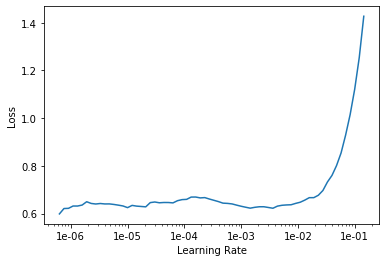

In [64]:
learn.recorder.plot()

In [65]:
learn.unfreeze()

In [66]:
learn.fit_one_cycle(5,max_lr=slice(1e-5,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.666937,1.232301,0.305600,06:31
1,0.691077,1.230568,0.305800,06:34
2,0.613629,1.180382,0.291800,06:42
3,0.535831,1.161839,0.287600,06:15
4,0.473330,1.163565,0.287600,06:50


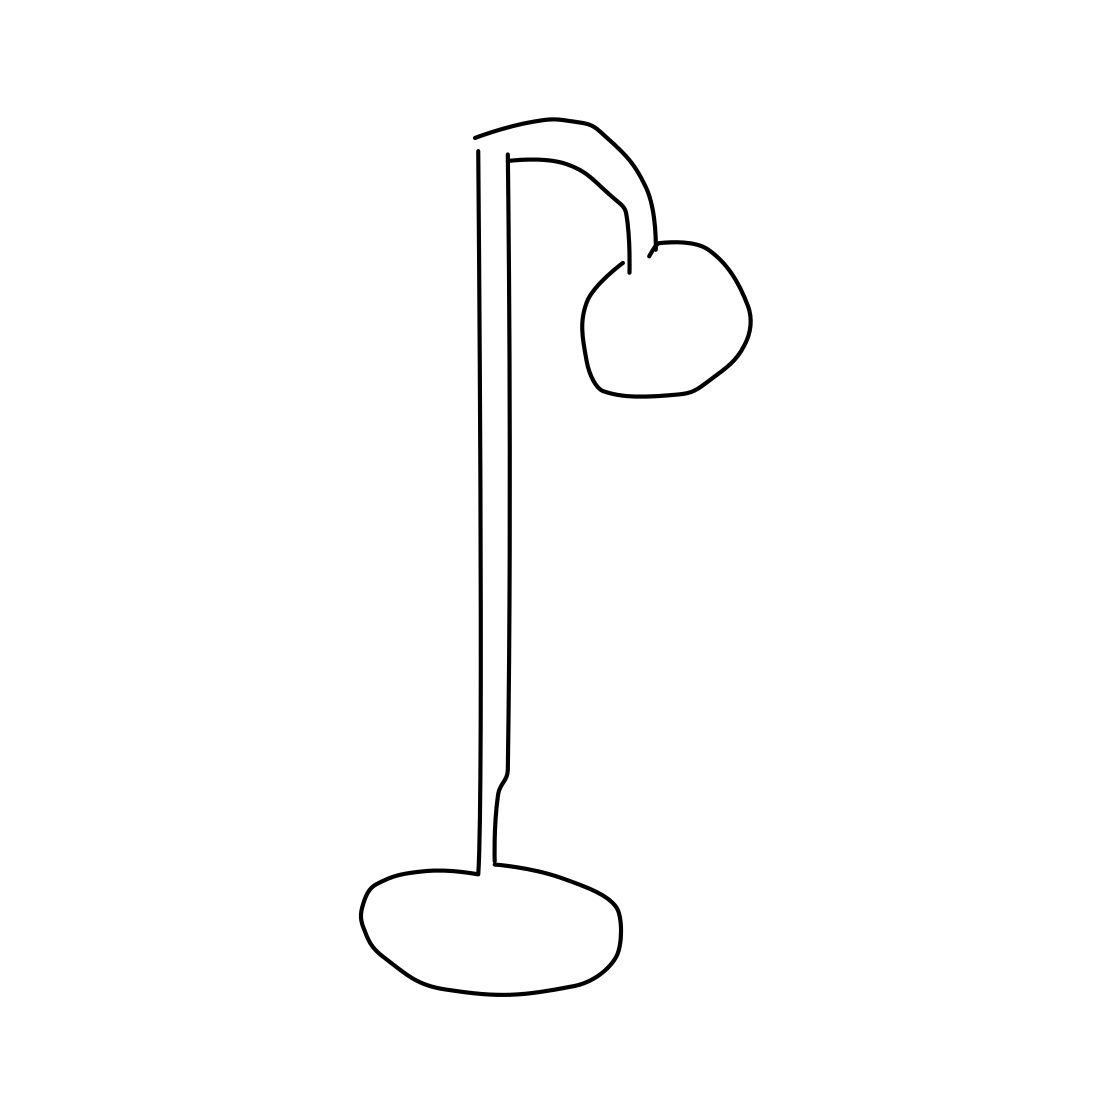

In [37]:
test[0]

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


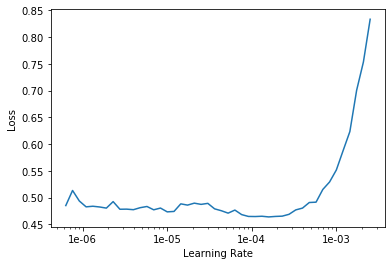

In [68]:
learn.lr_find()
learn.recorder.plot()

In [12]:
learn.load("71.3%")

Learner(data=ImageDataBunch;

Train: LabelList (10000 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
1,1,1,1,1
Path: C:\Users\Osama\Desktop\Sketch Recogniton\Data;

Valid: LabelList (5000 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
1,1,1,1,1
Path: C:\Users\Osama\Desktop\Sketch Recogniton\Data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.

In [14]:
learn2 = cnn_learner(data,models.resnet50,metrics=error_rate,model_dir='C:/Users/Osama/Desktop/Sketch Recogniton/Models64/', callback_fns=[CSVLogger])

In [15]:
learn2.fit_one_cycle(20,callbacks=[SaveModelCallback(learn2, every='epoch', monitor='error_rate')])

epoch,train_loss,valid_loss,error_rate,time
0,5.222534,4.271049,0.800000,5:05:39
1,3.825874,2.936772,0.616200,05:30
2,2.782734,2.125510,0.501200,05:45
3,2.174078,1.801535,0.457800,06:07
4,1.858672,1.600335,0.407000,06:06
5,1.653612,1.517329,0.388000,06:17
6,1.461000,1.431838,0.362800,05:53
7,1.356236,1.395658,0.358200,05:54
8,1.219839,1.328321,0.331200,05:44
9,1.080114,1.300504,0.328000,05:46


In [24]:
predictions, *_ = learn.get_preds(DatasetType.Test)
labels = np.argmax(predictions, 1)
print(labels)

tensor([215, 173,  64,  ...,  60,  17, 100])


In [26]:
import os

In [31]:
files = os.listdir(path/"Test")
x = pd.DataFrame(files)
br = pd.DataFrame()
br["File Names"] = x[0]
br["labels"] = labels

In [33]:
br.to_csv("test_results_osama.csv")

In [17]:
learn2.load("71.8%")

Learner(data=ImageDataBunch;

Train: LabelList (10000 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
1,1,1,1,1
Path: C:\Users\Osama\Desktop\Sketch Recogniton\Data;

Valid: LabelList (5000 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
1,1,1,1,1
Path: C:\Users\Osama\Desktop\Sketch Recogniton\Data;

Test: LabelList (5000 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: EmptyLabelList
,,,,
Path: C:\Users\Osama\Desktop\Sketch Recogniton\Data, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, cei

In [19]:
learn2.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


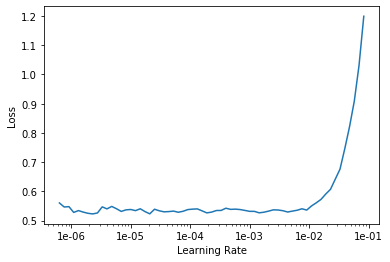

In [20]:
learn2.recorder.plot()

In [21]:
learn2.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


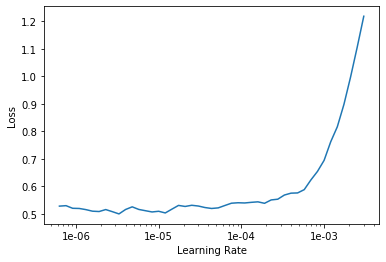

In [22]:
learn2.lr_find()
learn2.recorder.plot()

In [23]:
learn2.fit_one_cycle(5,max_lr=slice(5e-6,5e-5))

epoch,train_loss,valid_loss,error_rate,time
0,0.490028,1.154592,0.285200,05:37
1,0.522494,1.162652,0.282600,07:16
2,0.465659,1.138916,0.278200,07:28
3,0.416576,1.120525,0.274800,08:11
4,0.379093,1.122313,0.275400,07:45


In [24]:
predictions, *_ = learn2.get_preds(DatasetType.Test)
labels = np.argmax(predictions, 1)
files = os.listdir(path/"Test")
x = pd.DataFrame(files)
br = pd.DataFrame()
br["File Names"] = x[0]
br["labels"] = labels
br.to_csv("test_results_resnet.csv")

In [52]:
learn = cnn_learner(data,models.resnet50,metrics=error_rate,model_dir='C:/Users/Osama/Desktop/Sketch Recogniton/ModelsNew/', callback_fns=[CSVLogger])
# learn.callback_fns.append(partial(EarlyStopping, monitor='error_rate', min_delta=0.01, patience=3))

In [53]:
learn.fit_one_cycle(50,callbacks=[SaveModelCallback(learn, every='epoch', monitor='error_rate')])

epoch,train_loss,valid_loss,error_rate,time
0,5.152357,4.368530,0.815538,05:03
1,4.140271,3.451457,0.672112,06:01
2,3.345638,2.722464,0.572112,05:52
3,2.729509,2.149001,0.482470,06:22
4,2.215326,1.796715,0.435857,06:09
5,1.938250,1.586545,0.403586,06:28
6,1.756026,1.456417,0.376494,06:39
7,1.583803,1.406941,0.364940,06:20
8,1.483090,1.361400,0.362151,06:58
9,1.383889,1.293300,0.335060,06:22


In [54]:
learn.load("77.4%")

Learner(data=ImageDataBunch;

Train: LabelList (12490 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
1,1,1,1,1
Path: C:\Users\Osama\Desktop\Sketch Recogniton\Data;

Valid: LabelList (2510 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: CategoryList
1,1,1,1,1
Path: C:\Users\Osama\Desktop\Sketch Recogniton\Data;

Test: LabelList (5000 items)
x: ImageList
Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128),Image (3, 128, 128)
y: EmptyLabelList
,,,,
Path: C:\Users\Osama\Desktop\Sketch Recogniton\Data, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, cei

In [1]:
# data = ImageDataBunch.from_csv(path,size=128, suffix='.jpg', ds_tfms=get_transforms())
# data = ImageDataBunch.from_df(path,size=128, suffix='.jpg', ds_tfms=get_transforms())
data = (ImageList.from_csv(path,csv_name='labels.csv', suffix='.png')
        .split_from_df()
        .label_from_df()
        #How to label? -> use the second column of the csv file and split the tags bxy ' '
        .transform(get_transforms(), size=256)
        #Data augmentation? -> use tfms with a size of 128
        .databunch(bs=8))                          
        #Finally -> use the defaults for conversion to databunch

NameError: name 'ImageList' is not defined

In [67]:
learn = cnn_learner(data,models.resnet50,metrics=error_rate,model_dir='C:/Users/Osama/Desktop/Sketch Recogniton/ModelsNew/', callback_fns=[CSVLogger])
# learn.callback_fns.append(partial(EarlyStopping, monitor='error_rate', min_delta=0.01, patience=3))

In [68]:
learn.load("77.4%")
learn.fit_one_cycle(10,callbacks=[SaveModelCallback(learn, every='epoch', monitor='error_rate')])

epoch,train_loss,valid_loss,error_rate,time


KeyboardInterrupt: 

In [65]:
torch.cuda.empty_cache()
